In [3]:
import pandas as pd
import matplotlib.pyplot as plt

In [5]:
#Load dataset
df = pd.read_csv('./project_dataset/consolidated_ironhack_data.csv')
df.head()

,fee_id,cash_request_id,type,status,category,total_amount,reason,fee_created_at,updated_at,paid_at,from_date,to_date,charge_moment,id_y,cash_request_created_at,cash_request_amount,cohort_month
0,6537,14941.0,instant_payment,rejected,NaN,5.0,Instant Payment Cash Request 14941,2020-09-07 10:47:27.42315+00,2020-10-13 14:25:09.396112+00,2020-12-17 14:50:07.47011+00,NaN,NaN,after,14941.0,2020-09-07 10:46:57.780263+00,100.0,2020-09
1,6961,11714.0,incident,accepted,rejected_direct_debit,5.0,rejected direct debit,2020-09-09 20:51:17.998653+00,2020-10-13 14:25:15.537063+00,2020-12-08 17:13:10.45908+00,NaN,NaN,after,11714.0,2020-08-10 13:15:54.291488+00,100.0,2020-08
2,16296,23371.0,instant_payment,accepted,NaN,5.0,Instant Payment Cash Request 23371,2020-10-23 10:10:58.352972+00,2020-10-23 10:10:58.352994+00,2020-11-04 19:34:37.43291+00,NaN,NaN,after,23371.0,2020-10-23 10:10:43.278601+00,100.0,2020-10
3,20775,26772.0,instant_payment,accepted,NaN,5.0,Instant Payment Cash Request 26772,2020-10-31 15:46:53.643958+00,2020-10-31 15:46:53.643982+00,2020-11-19 05:09:22.500223+00,NaN,NaN,after,26772.0,2020-10-31 15:46:14.15673+00,100.0,2020-10
4,11242,19350.0,instant_payment,accepted,NaN,5.0,Instant Payment Cash Request 19350,2020-10-06 08:20:17.170432+00,2020-10-13 14:25:03.267983+00,2020-11-02 14:45:20.355598+00,NaN,NaN,after,19350.0,2020-10-06 00:40:24.008752+00,50.0,2020-10


In [3]:
#1. Metric to analyze: Frequncy of Service Usage

In [7]:
# Filter for "instant" type transactions
cash_advance_df = df[df["type"] == "instant_payment"]

In [29]:
# Count the total number of transactions per cohort (group by 'cohort_month')
cohort_transaction_count = cash_advance_df.groupby('cohort_month')['fee_id'].count().reset_index(name='total_transactions')
print(cohort_transaction_count)

  cohort_month  total_transactions
0      2020-07                 127
1      2020-08                1515
2      2020-09                2521
3      2020-10                6819
4      2020-11                 113


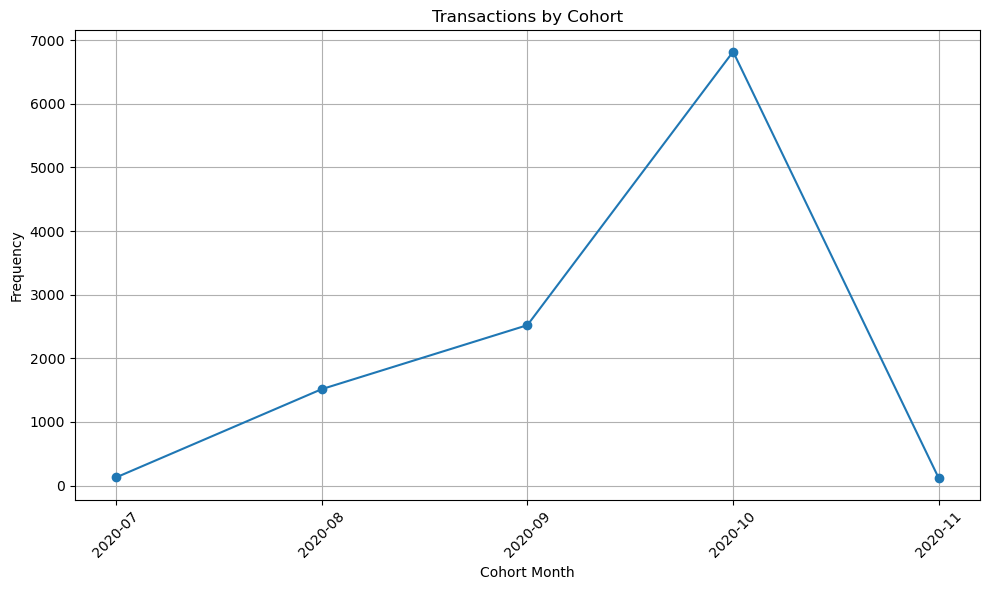

In [35]:
# Plot the frequency of cash advance usage by cohort month
plt.figure(figsize=(10, 6))
plt.plot(cohort_transaction_count['cohort_month'].astype(str), cohort_transaction_count['total_transactions'], marker='o')
plt.title("Transactions by Cohort")
plt.xlabel("Cohort Month")
plt.ylabel("Frequency")
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()